###<font color="#5500ff">Comparison of the Graphs of Loss vs Trainable Parameters for Log Loss and MSE for Classification Problem</font>

Hypothesis: We cannot use MSE for Logistic Regression as it has the problem of multiple local minima while logistic loss cost function has single global minima.


> Algorithms might stuck in some local region in case of MSE for Logistic Regression

---

Acknowledgement:
- Prof. Naveen Kumar
- Dr. Ankit Rajpal
- Bhomic Kaushik

In [1]:
#This library is used for interactive plots of matplotlib in jupyter notebooks

!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.1 MB/s eta 0:00:00


In [3]:
import numpy as np
from numpy import dot,log, e, shape
import matplotlib.pyplot as plt
import random
%matplotlib widget
from mpl_toolkits import mplot3d



from google.colab import output
output.enable_custom_widget_manager()

>**Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number.**

> **Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set


<font color="#ff0066">

  $g(z) = \frac{1}{1+e^{-z}}$ </font>

</font>

In [4]:
def sigmoid(z):
  sig = 1/(1+e**(-z))
  return sig


##Run 1 with Hard Coded Dataset

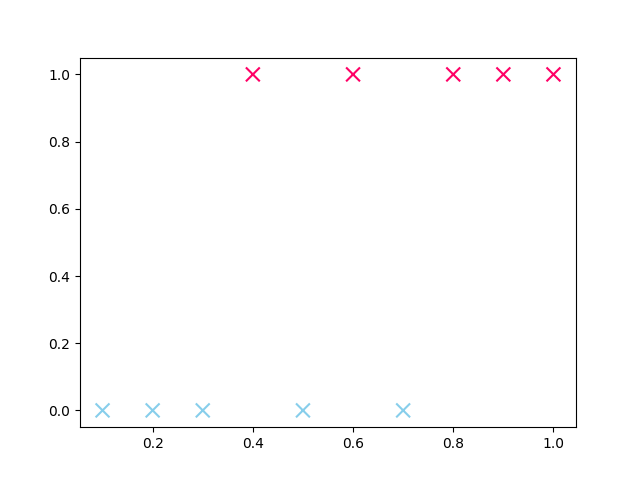

In [5]:
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y = [0  , 0  , 0,   1,   0,   1,   0,   1,   1,  1 ]

X = np.array(X)
y = np.array(y)

plt.figure()
plt.scatter(X, y, marker='x', s=100, c = ['#ff0066' if y_ == 1 else 'skyblue' for y_ in y])
plt.show()


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.



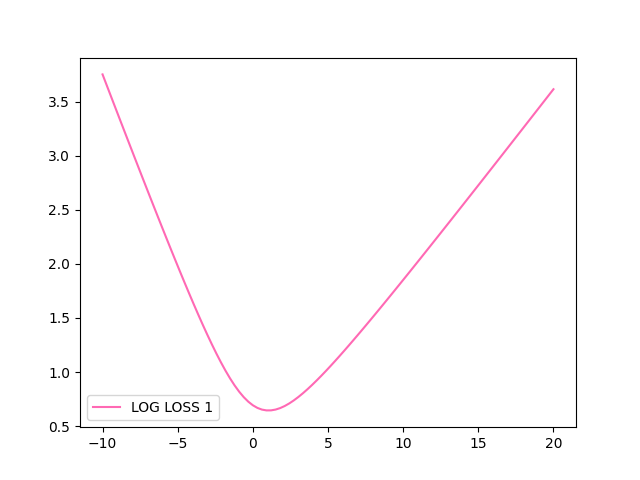

In [6]:
#cost of log loss
def cost(theta):
    z = dot(X,theta)
    cost0 = y.T.dot(log(sigmoid(z)))
    cost1 = (1-y).T.dot(log(1-sigmoid(z)))
    cost = -((cost1 + cost0))/len(y)
    return cost

w_range = [x_ for x_ in np.linspace(-10, 20, 100)]
cost_range = [cost(w_) for w_ in w_range]

plt.figure()
plt.plot(w_range, cost_range, c = "hotpink", label="LOG LOSS 1")
plt.legend()
plt.show()

## **Squared error for logistic regression**
For **Linear** Regression we have used the **squared error cost function**:
The equation for the squared error cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b $$
in case of Linear Regression


  As $f_{wb}(x)$ now has a non-linear component, the sigmoid function:  <font color="#5500ff"> $f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$. </font>  Let's try a squared error cost on the example from an earlier lab, now including the sigmoid.

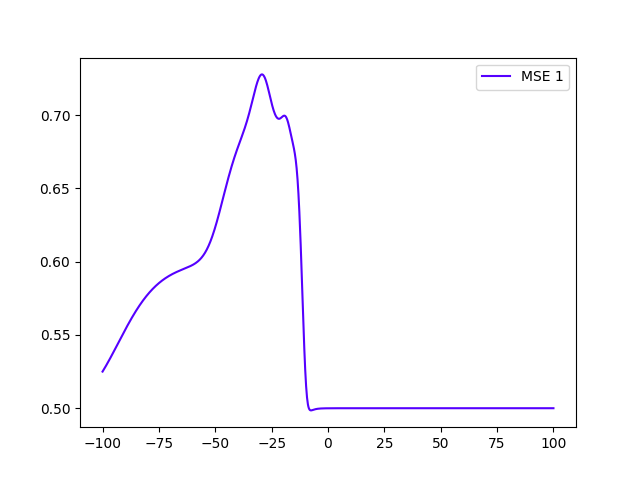

In [7]:
bias_t = 10

#mean squared error
def cost_mse(theta):
    cost = 0
    for ind in range(len(X)):
      z = X[ind] * theta + bias_t
      s = sigmoid(z)
      cost = cost + (s - y[ind])*(s - y[ind])
    return cost/len(y)

w_range = [x_ for x_ in np.linspace(-100, 100, 1000)]

cost_range = [cost_mse(w_) for w_ in w_range]

plt.figure()
plt.plot(w_range, cost_range, label="MSE 1", c = "#5500ff")
plt.legend()
plt.show()

##Run 2 with Hard Coded Dataset and Outliers



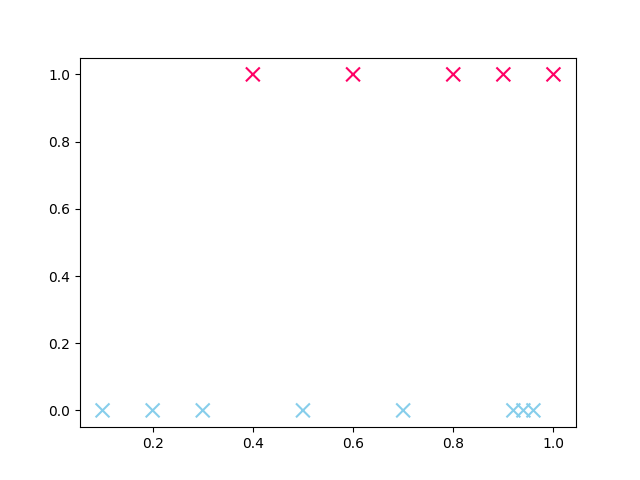

In [ ]:
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.94, 0.96, 1.0]
y = [0  , 0  , 0,   1,   0,   1,   0,   1,   1,  0, 0, 0, 1 ]

X = np.array(X)
y = np.array(y)

plt.figure()
plt.scatter(X, y, marker='x', s=100, c = ['#ff0066' if y_ == 1 else 'skyblue' for y_ in y])
plt.show()

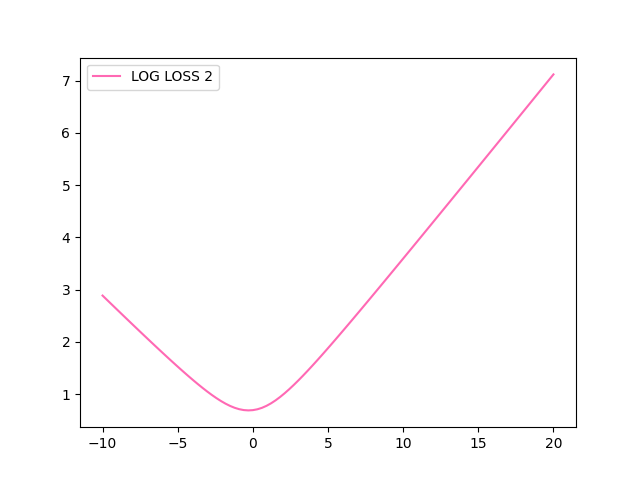

In [ ]:
w_range = [x_ for x_ in np.linspace(-10, 20, 100)]
cost_range = [cost(w_) for w_ in w_range]

plt.figure()
plt.plot(w_range, cost_range, c = "hotpink", label="LOG LOSS 2")
plt.legend()
plt.show()

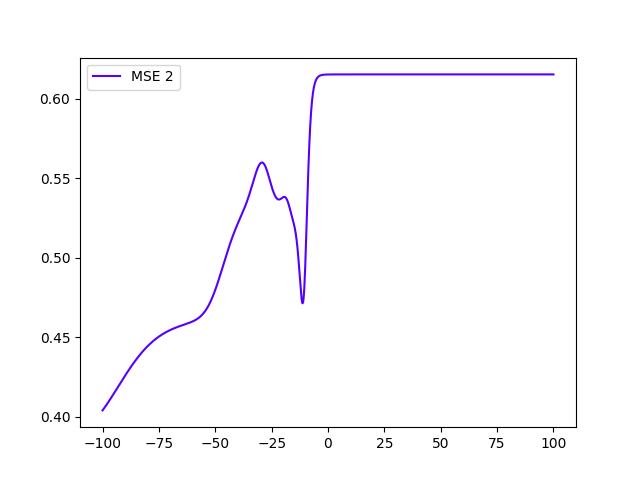

In [ ]:
w_range = [x_ for x_ in np.linspace(-100, 100, 1000)]

cost_range = [cost_mse(w_) for w_ in w_range]


plt.figure()
plt.plot(w_range, cost_range, label="MSE 2", c="#5500ff")
plt.legend()
plt.show()

## Run 3 with Random Dataset

In [ ]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

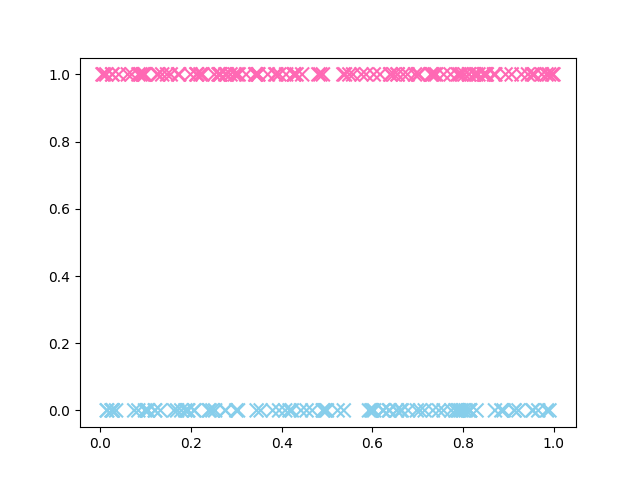

In [ ]:
X = [random.random()  for x_ in range(200)]
y = [1 if random.random() > 0.5 else 0 for x_ in X]

X = np.array(X)
y = np.array(y)


plt.figure()
plt.scatter(X, y, marker='x', s=100,  c = ['hotpink' if y_ == 1 else 'skyblue' for y_ in y])
plt.show()

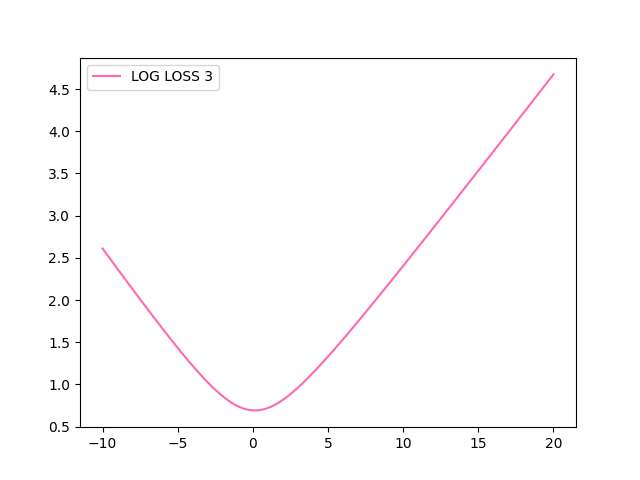

In [ ]:
w_range = [x_ for x_ in np.linspace(-10, 20, 100)]
cost_range = [cost(w_) for w_ in w_range]


plt.figure()
plt.plot(w_range, cost_range, c = "hotpink", label="LOG LOSS 3")
plt.legend()
plt.show()

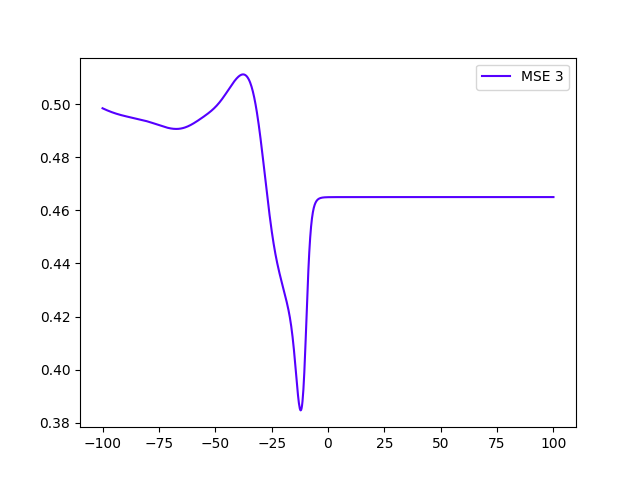

In [ ]:
w_range = [x_ for x_ in np.linspace(-100, 100, 1000)]

cost_range = [cost_mse(w_) for w_ in w_range]


plt.figure()
plt.plot(w_range, cost_range, label="MSE 3", c="#5500ff")
plt.legend()
plt.show()

##Run 4 with Half Split Dataset



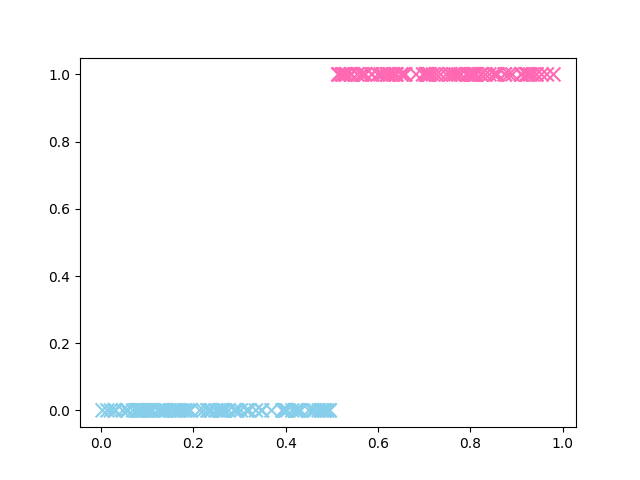

In [ ]:
X = [random.random()  for x_ in range(200)]
y = [1 if x_ > 0.5 else 0 for x_ in X]

X = np.array(X)
y = np.array(y)


plt.figure()
plt.scatter(X, y, marker='x', s=100, c = ['hotpink' if y_ == 1 else 'skyblue' for y_ in y])
plt.show()

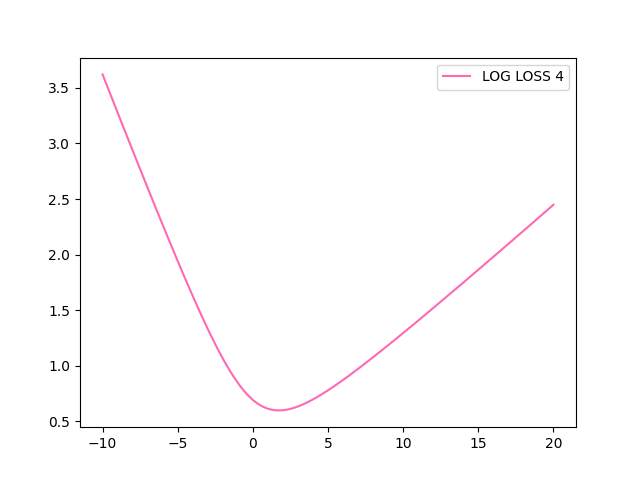

In [ ]:
w_range = [x_ for x_ in np.linspace(-10, 20, 100)]
cost_range = [cost(w_) for w_ in w_range]


plt.figure()
plt.plot(w_range, cost_range, c = "hotpink", label="LOG LOSS 4")
plt.legend()
plt.show()

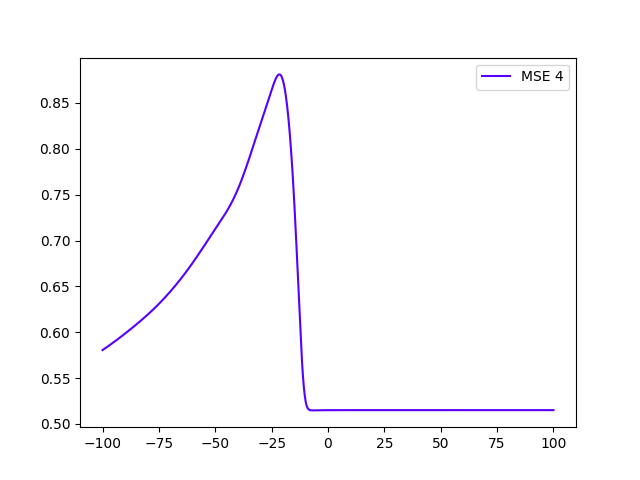

In [ ]:
w_range = [x_ for x_ in np.linspace(-100, 100, 1000)]

cost_range = [cost_mse(w_) for w_ in w_range]


plt.figure()
plt.plot(w_range, cost_range, label="MSE 4", c="#5500ff")
plt.legend()
plt.show()

In [ ]:
w_x = np.outer(np.linspace(-30, 30, 100), np.ones(100))
w_y = w_x.copy().T # transpose

# for i_ in range(len(w_x)):
#   for j_ in range(len(w_x[0])):
#     print(w_x[i_][j_], w_y[i_][j_])


In [ ]:
X = np.array([0,1,2,3,4,5])
y = np.array([0,0,0,1,1,1])

In [ ]:
#cost of log loss
def cost_log_2(theta, b):
    z = dot(X,theta) + np.ones(len(y))*b
    # print(z)
    # print(np.ones(len(y))*b)
    cost0 = y.T.dot(log(sigmoid(z)))
    cost1 = (1-y).T.dot(log(1-sigmoid(z)))
    cost = -((cost1 + cost0))/len(y)
    return cost

def cost_mse_2(theta, b):
    cost = 0
    for ind in range(len(X)):
      z = X[ind] * theta + b
      s = sigmoid(z)
      cost = cost + (s - y[ind])*(s - y[ind])
    return cost/len(y)


In [ ]:
cost_mat_log = []
cost_mat_mse = []

for i_ in range(len(w_x)):
  row_1 = []
  row_2 = []
  for j_ in range(len(w_x[0])):
    w = w_x[i_][j_]
    b = w_y[i_][j_]
    # print(w, b)
    row_1.append(cost_log_2(w, b))
    row_2.append(cost_mse_2(w, b))
  cost_mat_log.append(row_1)
  cost_mat_mse.append(row_2)

print(cost_mat_log)
print(cost_mat_mse)

cost_mat_log_np = np.array(cost_mat_log)
cost_mat_mse_np = np.array(cost_mat_mse)

<ipython-input-19-030f67695c4a>:7: RuntimeWarning: divide by zero encountered in log
  cost1 = (1-y).T.dot(log(1-sigmoid(z)))


[[75.00000000000001, 74.69696969696973, 74.39393939393945, 74.0909090909092, 73.78787878787897, 73.4848484848488, 73.18181818181877, 72.87878787878897, 72.57575757575957, 72.27272727273093, 71.96969696970366, 71.66666666667892, 71.36363636365881, 71.06060606064725, 70.75757575765125, 70.45454545468387, 70.15151515176888, 69.84848484894997, 69.5454545463072, 69.24242424398733, 68.93939394225937, 68.63636364161654, 68.33333334296292, 68.03030304795594, 67.72727275963395, 67.42424248356686, 67.1212122299654, 66.81818201754777, 66.51515188062812, 66.21212188211065, 65.90909213731044, 65.60606285762019, 65.3030344305559, 65.0000075664832, 64.69698356755016, 64.3939648205432, 64.09095569988212, 63.78796422128536, 63.48500506755306, 63.182105116269845, 62.87931350904165, 62.57671989628768, 62.274487172603294, 61.97290914975707, 61.67250873601324, 61.37419434332492, 61.079477242977305, 60.790686810854076, 60.51096789184811, 60.24369295127625, 59.99116769875101, 59.75339213427238, 59.5280605482

#Log loss surface plot

For different w and b values

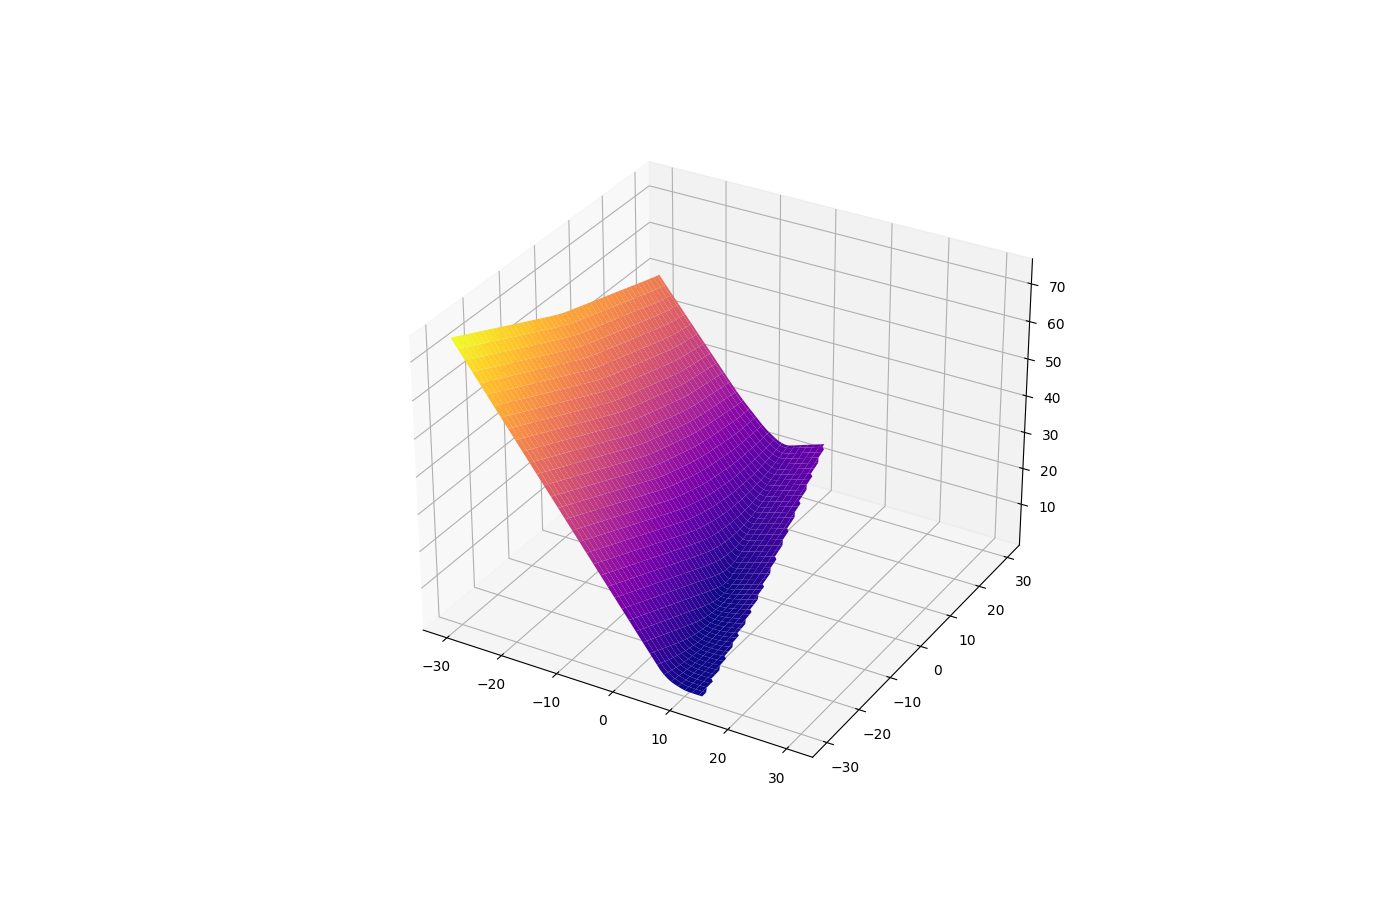

In [ ]:
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(w_x, w_y, cost_mat_log_np, cmap="plasma")

# show plot
plt.show()

#MSE Surface plot

For different w and b values



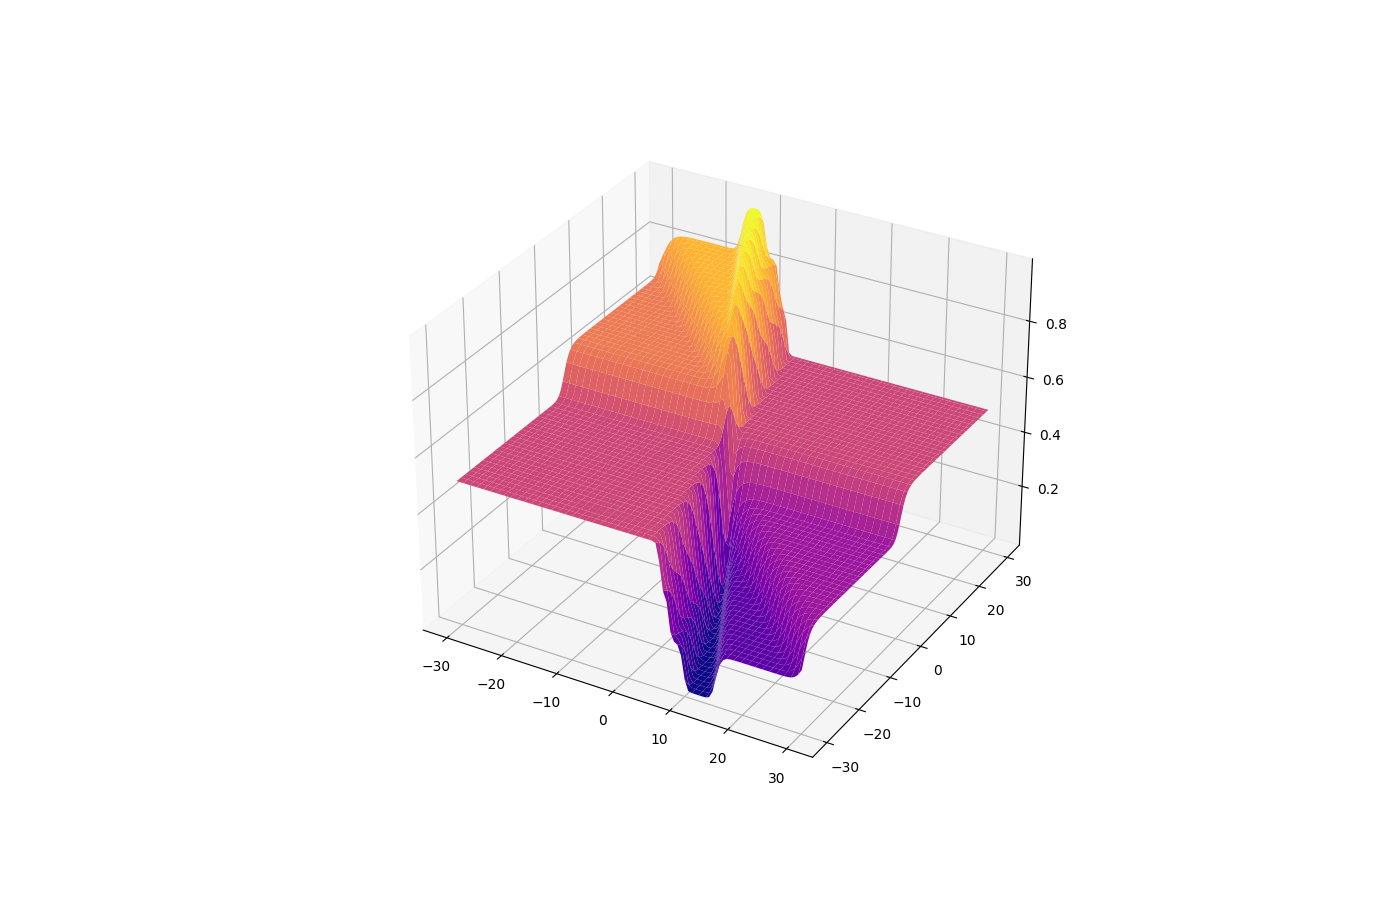

In [ ]:
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(w_x, w_y, cost_mat_mse_np, cmap="plasma")

# show plot
plt.show()

<font color="#ff0066">Hence, We can observe multiple local minima in case of different datasets and different parameter values</font>